In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [84]:
%matplotlib inline

In [2]:
PATH = r'E:/names/'

In [11]:
def get_data_frame(start_year, end_year):
    names_by_year = {}
    names=['Name', 'Gender', 'Count']
    for year in range(start_year, end_year+1):
        names_by_year[year] = pd.read_csv(f'{PATH}yob{year}.txt', names=names)
    all_names = pd.concat(names_by_year).reset_index(level=1, drop=True)
    all_names.index.name = 'Year'
    return all_names

In [98]:
def draw_line_graph(start_year, end_year, *args):
    all_names = get_data_frame(start_year, end_year)
    all_names = all_names[all_names['Name'].isin(args)]
    names_sorted = all_names.groupby([all_names.index, 'Name']).sum().unstack('Name')
    names_sorted_plot = names_sorted.plot(title=f'{", ".join(str(x) for x in args)} popularity dynamics in {start_year}-{end_year}')
    names_sorted_plot.legend()


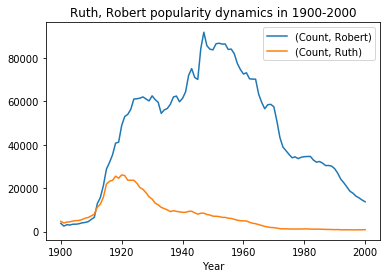

In [99]:
draw_line_graph(1900, 2000, 'Ruth', 'Robert')

In [100]:
def draw_bar(start_year, end_year, step, *args):
    all_names = get_data_frame(start_year, end_year)
    names_sorted = all_names[all_names['Name'].isin(args)]
    names_sorted = names_sorted.groupby(['Year', 'Name']).sum().unstack('Name')[::step]
    names_sorted_plot = names_sorted.plot.bar()
    names_sorted_plot.legend()

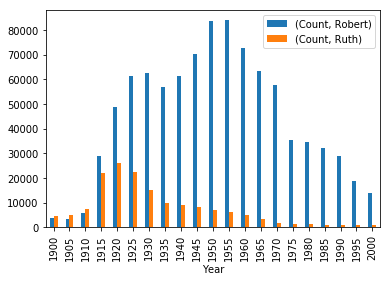

In [103]:
draw_bar(1900, 2000, 5,  'Ruth','Robert')

In [152]:
def draw_pie(letter, start_year, end_year=None):
    year = f'{start_year}-{end_year}'
    if not end_year: 
        end_year = start_year
        year = f'{start_year}'
    
        
    all_names = get_data_frame(start_year, end_year)
    letter = letter.upper()
    names_letter = all_names[all_names.Name.str.startswith(letter)].groupby('Name').sum().nlargest(10, 'Count')
    names_letter_plot = names_letter.plot(kind='pie', y='Count', title=f'Top 10 names starting with {letter} in {year}', legend=False)

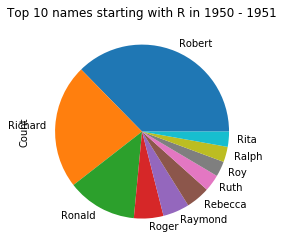

In [154]:
draw_pie('r', 1950, 1951)

In [160]:
def draw_scatter(start_year, end_year):
    pattern = 'B|C|D|F|G|H|J|K|L|M|N|P|Q|R|S|T|V|W|X|Z|b|c|d|f|g|h|j|k|l|m|n|p|q|r|s|t|v|w|x|z'
    all_names = get_data_frame(start_year, end_year).groupby('Name', as_index=False).sum()
    all_names['Consonant'] = all_names['Name'].str.count(pattern)
    all_names.plot(kind='scatter', x='Consonant', y='Count')
    plt.xlabel('Number of consonants')
    plt.ylabel('Count')
    plt.title(f'Names popularity by number of consonants in {start_year}-{end_year}')

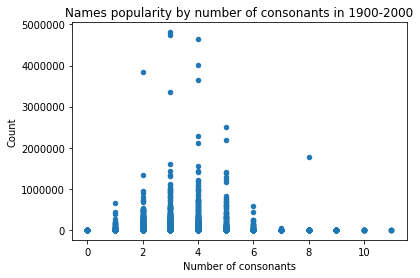

In [161]:
draw_scatter(1900,2000)